<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/11_DeepLearning_Project_04272023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|평가문항	|상세기준|내평가|
|---|---|---|
|1. Boston 주택 가격 예측 프로젝트를 성공적으로 완료하였는가?	|프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.|<center>O</center>|
|2. Reuters 데이터의 분류 프로젝트를 성공적으로 완료하였는가?	|프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.|<center>O</center>|
|3. CIFAR10 데이터의 분류 프로젝트를 성공적으로 완료하였는가?	|프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.|<center>O</center>|

# Boston House Price
- 집값 예측
- feature의 값의 범위가 너무 달라 
    - 표준화가 필요함. 

## Load Data from keras

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [ ]:
train_data
# 값의 차이(10^(-2)~10^2)가 있어 표준화를 진행

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

## Preprocess

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
mean, std
# 축 개념이 혼동이 되었음.
# https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data  -mean
test_data = test_data - std

train_data, test_data

(array([[-0.43528338, -0.50398828, -1.6963705 , ..., -7.88452909,
         -3.76973875, -1.64453751],
        [-0.44949685, -0.3575834 , -1.82839562, ..., -9.18895907,
         -3.76991079, -1.94188131],
        [-0.39224795, -0.50398828, -1.48115445, ..., -8.05017099,
         -3.77215867, -1.93902407],
        ...,
        [-0.44934552, -0.44187712, -1.74131522, ..., -8.73344383,
         -3.77366066, -1.85197339],
        [-0.42452133, -0.50398828, -1.44917455, ..., -9.18895907,
         -3.78501325, -1.700349  ],
        [-0.44958349, -0.39751201, -1.80894838, ..., -9.00261193,
         -3.77202511, -1.91768999]]),
 array([[  -7.86420259,  -70.43695008,  -17.71460645, ...,  -21.14729398,
         -870.30553953,  -10.92275537],
        [ -25.82551259,  -70.43695008,  -25.80460645, ...,  -23.54729398,
         -502.60553953,  -23.76275537],
        [ -25.89383259,  -70.43695008,  -30.62460645, ...,  -21.14729398,
         -500.65553953,  -30.23275537],
        ...,
        [ -24.1150

In [ ]:
train_data.shape[1]

13

## Model and Compile

 Activation Function of Hidden layer
- relu : output value 0~N
- sigmoid : output value 0~1  (vanishing gradient)
- tanh : output value -1~1  (vanishing gradient)

Activation Function of Output layer
 - lenear output : regerssion(변환 없이 바로 나와 no activation이라고도)
 - logistic(sigmoid) : binary claasification
 - softmax : classification

In [ ]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], ), name='Input'))
model.add(layers.Dense(64, activation='sigmoid', name='Dense1'))
model.add(layers.Dense(64, activation='relu', name='Dense2'))
model.add(layers.Dense(1, activation='linear', name='Ouput'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 64)                896       
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 Ouput (Dense)               (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


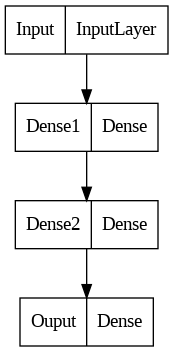

In [ ]:
from tensorflow.keras import models, utils
utils.plot_model(model)

In [ ]:
# 컴파일
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [ ]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=50,
                    batch_size=100,
                    validation_data=(test_data, test_labels))

Epoch 1/50
5/5 [==============================] - 1s 44ms/step - loss: 589.8265 - mae: 22.5073 - val_loss: 566.5385 - val_mae: 21.9909
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 543.1082 - mae: 21.4704 - val_loss: 539.8109 - val_mae: 21.3693
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 504.1610 - mae: 20.5421 - val_loss: 515.1541 - val_mae: 20.7712
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 466.7451 - mae: 19.6286 - val_loss: 487.1891 - val_mae: 20.0935
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 428.5379 - mae: 18.6572 - val_loss: 456.7793 - val_mae: 19.3318
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 387.9845 - mae: 17.5578 - val_loss: 422.7076 - val_mae: 18.4388
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 345.8638 - mae: 16.3543 - val_loss: 388.4046 - val_mae: 17.4822
Epoch 8/50
5/5 [==============================] - 0s 12

<ipython-input-93-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


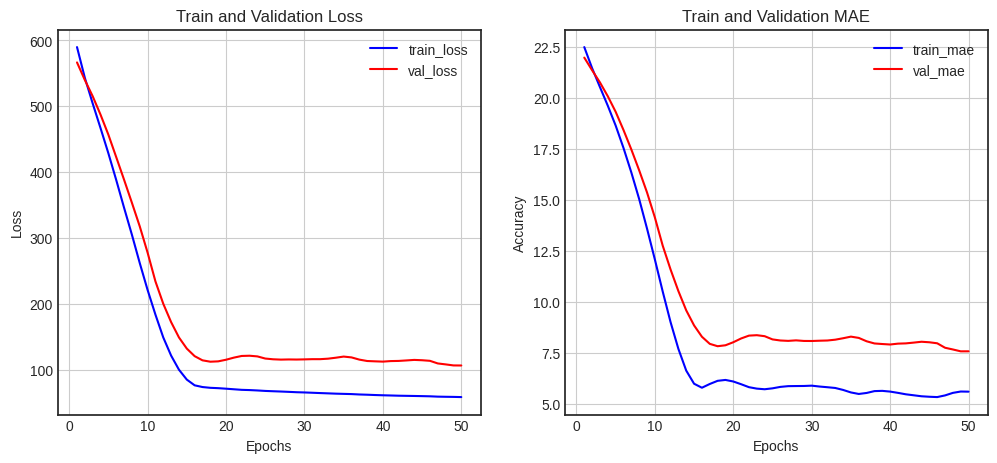

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## Evaluate & Predict

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 103.3645 - mae: 7.3830


[103.36447143554688, 7.383044242858887]

In [ ]:
model.predict(test_data[0:5])

1/1 [==============================] - 0s 63ms/step


array([[17.75235 ],
       [18.456524],
       [18.170938],
       [18.422775],
       [18.223404]], dtype=float32)

In [ ]:
test_labels[0:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

In [ ]:
# model.get_weights()

In [ ]:
import numpy as np
pred_ys = model.predict(test_data)
arg_pred_y = np.argmax(pred_ys, axis=1)

4/4 [==============================] - 0s 3ms/step


# Reuters
- 주제 분류
- 텍스트 데이터를 벡터로 변환 (주제 레이블도)
    - one-hot-encocding



## Load Data from keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data2, val_data, train_labels2, val_labels = train_test_split(train_data, train_labels, test_size=0.25)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(train_data2))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
8982
6736
2246
2246
46


In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

## Preprocess

In [ ]:
word_index = reuters.get_word_index() #데이터 셋이 단어 인덱스로 되어 있어 인덱스를 단어들로 변환
index_word = dict([(value, key) for (key, value) in word_index.items()]) #딕셔너리 형태로
news = ' '.join([str(i) for i in train_data[0]]) #단어들로 하나의 리뷰를 만들어줌.
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])  #
news

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data2)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels2)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [ ]:
train_data.shape, x_train.shape

((8982,), (6736, 10000))

## Model and Complie

In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

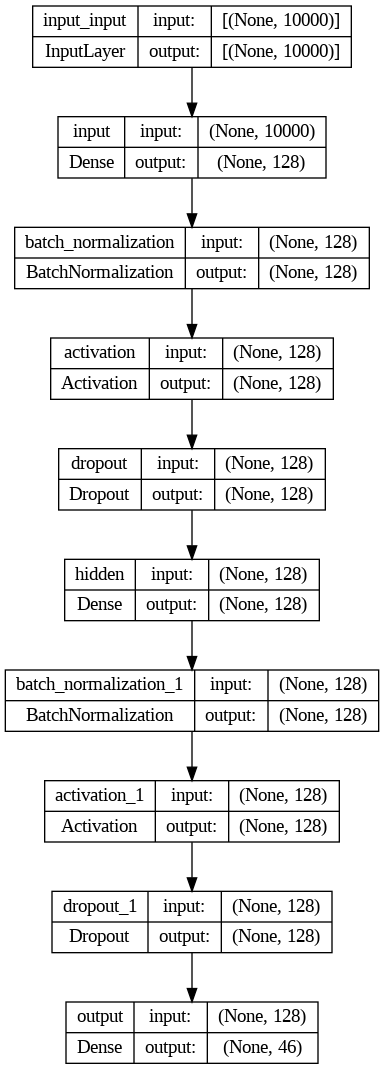

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('reuterst_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=40,
                    # batch_size=512
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
211/211 [==============================] - 13s 14ms/step - loss: 1.9430 - accuracy: 0.5598 - val_loss: 1.5228 - val_accuracy: 0.7053
Epoch 2/40
211/211 [==============================] - 2s 7ms/step - loss: 1.2415 - accuracy: 0.7053 - val_loss: 1.1085 - val_accuracy: 0.7685
Epoch 3/40
211/211 [==============================] - 1s 6ms/step - loss: 1.0001 - accuracy: 0.7634 - val_loss: 1.0146 - val_accuracy: 0.7823
Epoch 4/40
211/211 [==============================] - 1s 6ms/step - loss: 0.8327 - accuracy: 0.8008 - val_loss: 0.9788 - val_accuracy: 0.7930
Epoch 5/40
211/211 [==============================] - 1s 6ms/step - loss: 0.7085 - accuracy: 0.8299 - val_loss: 0.9423 - val_accuracy: 0.8023
Epoch 6/40
211/211 [==============================] - 1s 7ms/step - loss: 0.6148 - accuracy: 0.8452 - val_loss: 0.9397 - val_accuracy: 0.8081
Epoch 7/40
211/211 [==============================] - 1s 7ms/step - loss: 0.5484 - accuracy: 0.8645 - val_loss: 0.9393 - val_accuracy: 0.8103
Epoc

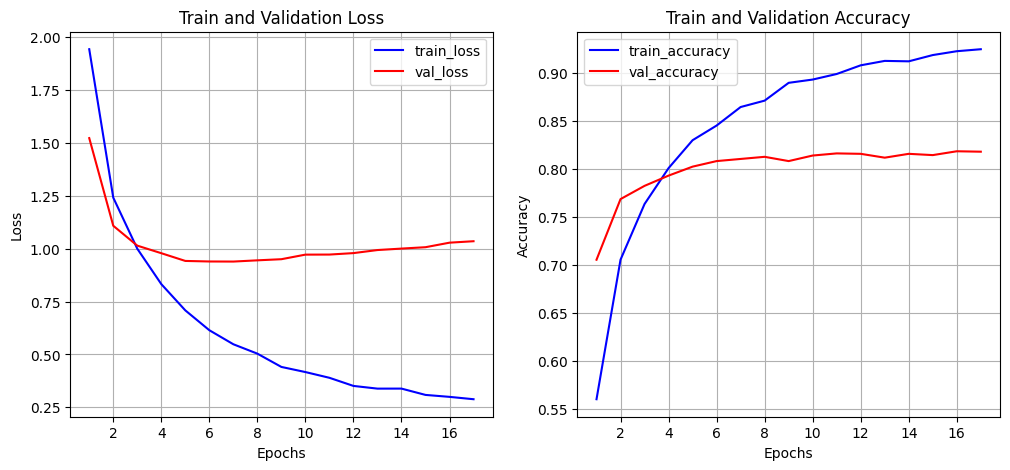

In [ ]:
# 모델이 잘 학습되었는지 확인하기 위해서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()
# 모델의 학습 결과를 살펴보면 에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소하는 것을 알 수 있습니다. 모델은 과대적합된 상태

## Evaluate & Predict

In [ ]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9792 - accuracy: 0.7939


[0.979225218296051, 0.7938557267189026]

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Confusion matrix
- y_test와 예측한 값의 타입이 달라서 여러 과정을 거쳐야 함.  => one-hot-encoding의 역변환 
        1. y_test가 one-hot-encoding으로 여러 열 중 맞는 셀 하나에 1이라는 숫자가 들어있음.  
        2. 숫자 1일 들어있는 자리를 np.where를 이용하여 알아냄.  
        3. 결과값의 타입이 튜플인데 이것을 str로 바꾸고  
        4. 그 중 숫자만 추출  
        5. 추출한 숫자를 리스트에 차례로 넣어줌(y_test_n)  
        6. confusion matrix를 만들 수 있음.

### 바보임? test_labels를 그냥 사용하면 되는 거였음 

In [ ]:
y_test.shape[0]
a=np.where(y_test[2]==1)
a
# a=str(a)
import re
int(re.sub(r'[^0-9]', '', str(a)))
# https://bskyvision.com/entry/python-%EB%88%88%EC%9D%84-%EA%B0%90%EA%B3%A0-%EC%9E%88%EC%9C%BC%EB%A9%B4-%EA%B2%BD%EB%B3%B4%EB%A5%BC-%EC%9A%B8%EB%A6%AC%EB%8A%94-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-%EC%A1%B8%EC%9D%8C%EC%9A%B4%EC%A0%84-%EB%B0%A9%EC%A7%80

1

In [ ]:
import re

y_test_n=[]
for i in range(y_test.shape[0]):
    a=np.where(y_test[i]==1)
    b=int(re.sub(r'[^0-9]', '', str(a)))
    y_test_n.append(b)

In [ ]:
y_test_n
# y_test_n == test_labes

[3,
 10,
 1,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 4,
 1,
 3,
 1,
 11,
 23,
 3,
 19,
 3,
 8,
 3,
 3,
 3,
 9,
 3,
 4,
 6,
 10,
 3,
 3,
 10,
 20,
 1,
 19,
 4,
 40,
 1,
 4,
 3,
 15,
 21,
 3,
 34,
 4,
 4,
 3,
 4,
 3,
 11,
 20,
 3,
 1,
 3,
 3,
 4,
 26,
 4,
 20,
 19,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 1,
 3,
 4,
 21,
 16,
 3,
 19,
 43,
 2,
 1,
 3,
 39,
 4,
 3,
 3,
 3,
 11,
 19,
 20,
 1,
 11,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 11,
 11,
 3,
 20,
 28,
 8,
 1,
 20,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 33,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 19,
 4,
 18,
 3,
 19,
 3,
 3,
 3,
 19,
 3,
 1,
 3,
 23,
 4,
 13,
 1,
 3,
 3,
 3,
 3,
 4,
 4,
 19,
 4,
 4,
 24,
 3,
 3,
 11,
 4,
 3,
 3,
 41,
 1,
 3,
 3,
 11,
 17,
 3,
 3,
 2,
 4,
 3,
 4,
 3,
 10,
 3,
 3,
 3,
 20,
 3,
 12,
 18,
 21,
 1,
 17,
 3,
 3,
 19,
 20,
 3,
 19,
 3,
 21,
 3,
 3,
 6,
 35,
 19,
 3,
 34,
 36,
 8,
 21,
 3,
 4,
 25,
 4,
 16,
 16,
 19,
 3,
 3,
 4,
 4,
 19,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 20,
 4,
 26,
 3,
 3,
 3,
 3,
 3,
 4,
 13,
 3,
 31,
 16,
 20,
 3,
 4,
 19,
 

In [ ]:
arg_pred_y

array([ 3, 10,  1, ...,  3,  4, 16])

In [ ]:
# classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.
from tensorflow.keras import utils
from sklearn.metrics import classification_report

pred_ys = model.predict(x_test)
arg_pred_y = np.argmax(pred_ys, axis=1)
y_test_cat = utils.to_categorical(y_test)
# print(classification_report(y_test_n, arg_pred_y))
print(classification_report(test_labels, arg_pred_y))


71/71 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.63      0.82      0.71       105
           2       0.72      0.65      0.68        20
           3       0.92      0.95      0.93       813
           4       0.85      0.89      0.87       474
           5       0.00      0.00      0.00         5
           6       0.72      0.93      0.81        14
           7       1.00      0.33      0.50         3
           8       0.57      0.71      0.64        38
           9       0.68      0.68      0.68        25
          10       0.89      0.83      0.86        30
          11       0.57      0.84      0.68        83
          12       0.57      0.31      0.40        13
          13       0.57      0.62      0.60        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.69     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CIFAR10
- 이미지 10개로 분류
- 32 * 32 *3 => 3072 
- 0 ~ 255  => 0 ~ 1

## Load Data from keras

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 7s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-5-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


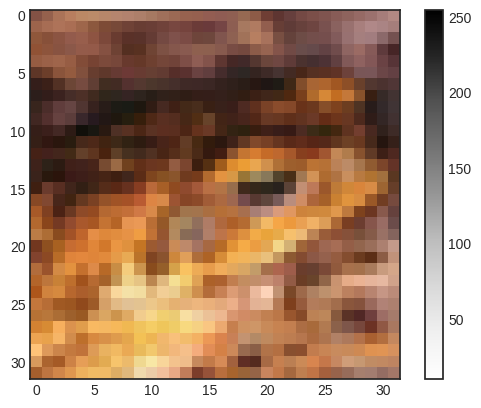

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

## Preprocess

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 *3)
x_val = x_val.reshape(-1, 32 * 32 *3)
x_test = x_test.reshape(-1, 32 * 32 *3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)
(40000, 1)


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## Model & Compile

In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072,), name='Input'))
model.add(layers.Dense(2048, name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, name='hidden3'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', name='output'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit 진행 중  ValueError: Shapes (32, 1) and (32, 10) are incompatible 
# https://somjang.tistory.com/entry/TF20-MNIST-ValueError-Shapes-32-10-and-32-1-are-incompatible-%ED%95%B4%EA%B2%B0-%EB%B0%A9%EB%B2%95

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 hidden2 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

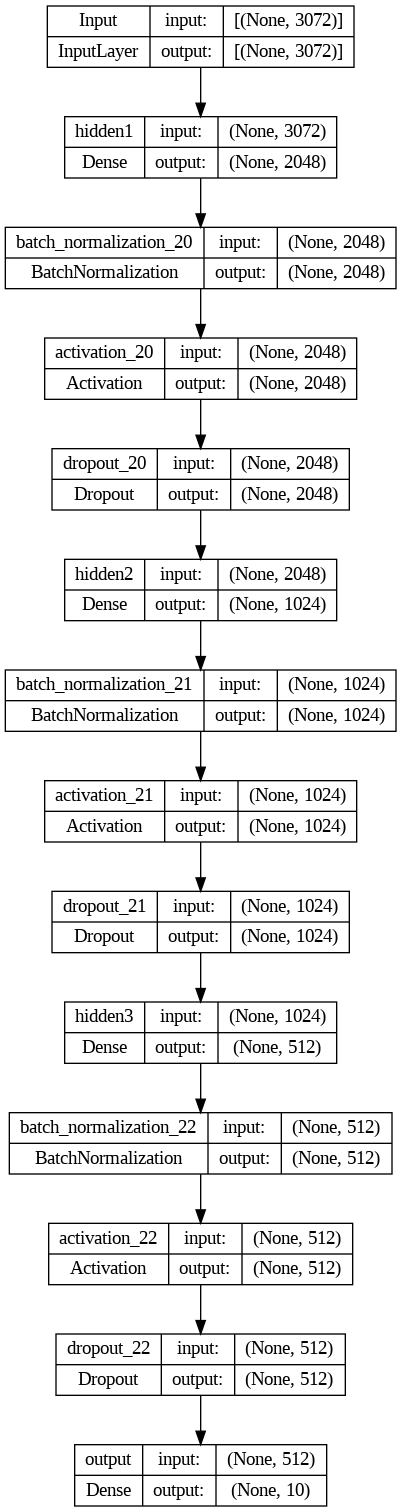

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, 
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 20s 10ms/step - loss: 1.9626 - accuracy: 0.3172 - val_loss: 1.7777 - val_accuracy: 0.3536
Epoch 2/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6721 - accuracy: 0.3993 - val_loss: 1.6514 - val_accuracy: 0.4055
Epoch 3/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5980 - accuracy: 0.4300 - val_loss: 1.6582 - val_accuracy: 0.4013
Epoch 4/60
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5396 - accuracy: 0.4516 - val_loss: 1.5345 - val_accuracy: 0.4523
Epoch 5/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4973 - accuracy: 0.4624 - val_loss: 1.5777 - val_accuracy: 0.4287
Epoch 6/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4600 - accuracy: 0.4796 - val_loss: 1.5382 - val_accuracy: 0.4491
Epoch 7/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4297 - accuracy: 0.4931 - val_loss: 1.4553 - val_accurac

In [ ]:
print(y_train)

[[6]
 [5]
 [6]
 ...
 [4]
 [9]
 [5]]


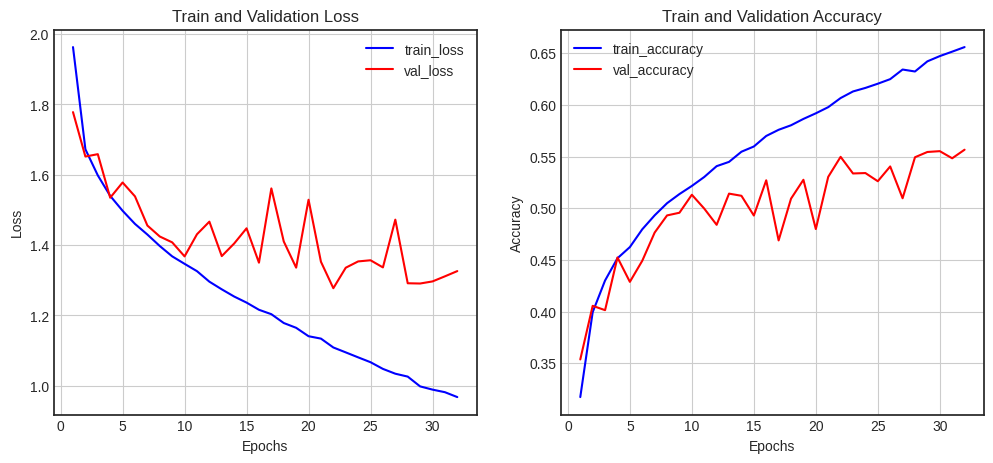

In [ ]:
# 모델이 잘 학습되었는지 확인하기 위해서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()
# 모델의 학습 결과를 살펴보면 에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소하는 것을 알 수 있습니다. 모델은 과대적합된 상태

## Evaluate

In [ ]:
model.evaluate(x_test, y_test)
#정확도가 0.5정도밖에 안됨. CNN하면 좋아진다고...

313/313 [==============================] - 1s 3ms/step - loss: 1.2653 - accuracy: 0.5559


[1.2653248310089111, 0.555899977684021]

In [ ]:
arg_pred_y

array([ 3, 10,  1, ...,  3,  4, 16])

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

pred_ys = model.predict(x_test)
arg_pred_y = np.argmax(pred_ys, axis=1)
y_test_cat = utils.to_categorical(y_test)
print(classification_report(y_test, arg_pred_y))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1000
           1       0.62      0.70      0.66      1000
           2       0.59      0.28      0.38      1000
           3       0.39      0.36      0.38      1000
           4       0.53      0.46      0.49      1000
           5       0.43      0.53      0.47      1000
           6       0.64      0.58      0.61      1000
           7       0.62      0.64      0.63      1000
           8       0.58      0.77      0.66      1000
           9       0.57      0.61      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.55     10000
weighted avg       0.56      0.56      0.55     10000

